## OpenCV’s GrabCut Example 
- Ref : https://www.pyimagesearch.com/2020/07/27/opencv-grabcut-foreground-segmentation-and-extraction/

In [1]:
import cv2
import numpy as np
import os

from matplotlib import pyplot as plt

### Constants 

In [2]:
# Output value of grabcut mask
GC_VALUES = (('Definite Background', cv2.GC_BGD),
             ('Probable Background', cv2.GC_PR_BGD),
             ('Definite Foreground', cv2.GC_FGD),
             ('Probable Foreground', cv2.GC_PR_FGD))

### Parameters

In [3]:
IMG_PATH = 'dog.jpg'
MASK_PATH = 'mask.jpg'
RECT = (60, 130, 300, 400)   # Bounding box of the object (x1, y1, x2, y2)
ITER = 10                    # Grabcut Iteration
MODE = cv2.GC_INIT_WITH_MASK # Grabcut mode (GC_INIT_WITH_RECT / GC_INIT_WITH_MASK)

### Load Image

In [4]:
img = cv2.imread(IMG_PATH)

### Grabcut Segmentation

In [5]:
# Allocate memory for Grabcut
mask = np.zeros(img.shape[:2], dtype='uint8')  # Output mask
bg_model = np.zeros((1, 65), dtype='float')    # Internal use
fg_model = np.zeros((1, 65), dtype='float')    # Internal use

In [6]:
# Load mask if mask mode is used
if MODE == cv2.GC_INIT_WITH_MASK:
    mask = cv2.imread(MASK_PATH, cv2.IMREAD_GRAYSCALE)

    # Convert to Grabcut mask value
    mask[mask > 0] = cv2.GC_PR_FGD
    mask[mask == 0] = cv2.GC_BGD

In [7]:
# Grabcut Segmentation
mask, bg_model, fg_model = cv2.grabCut(img, mask, RECT, bg_model, fg_model, ITER, MODE)

### Post Processing

In [8]:
# Set Definite / Propable BG to 0 and Definite / Propable FG to 1
output_mask = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD), 0, 1)

In [14]:
# Apply Input Mask
output_coarse = cv2.bitwise_and(img, img, mask=(mask * 255).astype('uint8'))

In [15]:
# Apply Mask
output = cv2.bitwise_and(img, img, mask=(output_mask * 255).astype('uint8'))

### Visualize Result

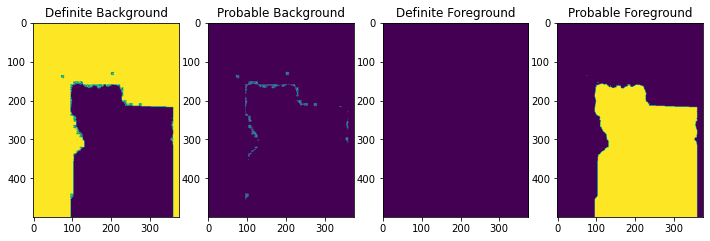

In [11]:
# Mask Value
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
for ind, (name, value) in enumerate(GC_VALUES):
    axs[ind].imshow(mask == value)
    axs[ind].set_title(name)

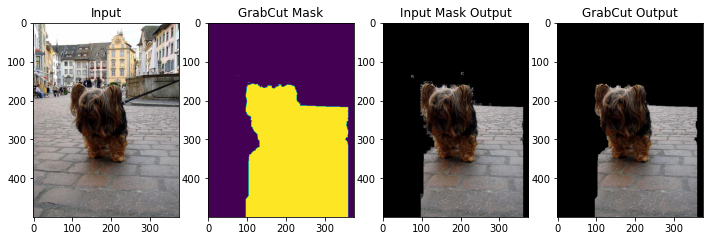

In [17]:
# Segmentation Result
titles = ['Input', 'GrabCut Mask', 'Input Mask Output', 'GrabCut Output']
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
for ind, im in enumerate([cv2.cvtColor(img, cv2.COLOR_BGR2RGB),
                          output_mask,
                          cv2.cvtColor(output_coarse, cv2.COLOR_BGR2RGB),
                          cv2.cvtColor(output, cv2.COLOR_BGR2RGB)]):
    axs[ind].imshow(im)
    axs[ind].set_title(titles[ind])